## **Importing Libraries**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import torch
from datetime import datetime

In [51]:
path = "../data/processed/preprocessed_energy_data.csv"
data = pd.read_csv(path)

In [52]:
#Display first five records
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,0.0,-1.139072,1.863478,-0.528718,1.092582,-1.245155,1.686863,-0.912635,...,-1.217324,0.958298,-0.147777,-2.684267,0.828905,1.226233,1.799947,0.367016,-0.807974,-0.807974
1,2016-01-11 17:10:00,60,0.0,-1.139072,1.634348,-0.528718,1.075633,-1.245155,1.705307,-0.912635,...,-1.200778,0.965526,-0.170232,-2.684267,0.828905,1.088599,1.799947,0.343175,-0.440240,-0.440240
2,2016-01-11 17:20:00,50,0.0,-1.139072,1.534580,-0.528718,1.051570,-1.245155,1.749367,-0.948663,...,-1.233869,0.951070,-0.192686,-2.684267,0.828905,0.950965,1.687977,0.319333,0.252109,0.252109
3,2016-01-11 17:30:00,50,0.0,-1.139072,1.475395,-0.528718,1.042363,-1.245155,1.769859,-0.966677,...,-1.233869,0.926976,-0.215141,-2.684267,0.828905,0.813331,1.320076,0.295491,1.408801,1.408801
4,2016-01-11 17:40:00,60,0.0,-1.139072,1.543034,-0.528718,1.027297,-1.245155,1.769859,-0.966677,...,-1.233869,0.926976,-0.237595,-2.684267,0.828905,0.675697,0.952175,0.271649,-1.028122,-1.028122


In [53]:
print(data.head())

                  date  Appliances  lights        T1      RH_1        T2  \
0  2016-01-11 17:00:00          60     0.0 -1.139072  1.863478 -0.528718   
1  2016-01-11 17:10:00          60     0.0 -1.139072  1.634348 -0.528718   
2  2016-01-11 17:20:00          50     0.0 -1.139072  1.534580 -0.528718   
3  2016-01-11 17:30:00          50     0.0 -1.139072  1.475395 -0.528718   
4  2016-01-11 17:40:00          60     0.0 -1.139072  1.543034 -0.528718   

       RH_2        T3      RH_3        T4  ...        T9      RH_9     T_out  \
0  1.092582 -1.245155  1.686863 -0.912635  ... -1.217324  0.958298 -0.147777   
1  1.075633 -1.245155  1.705307 -0.912635  ... -1.200778  0.965526 -0.170232   
2  1.051570 -1.245155  1.749367 -0.948663  ... -1.233869  0.951070 -0.192686   
3  1.042363 -1.245155  1.769859 -0.966677  ... -1.233869  0.926976 -0.215141   
4  1.027297 -1.245155  1.769859 -0.966677  ... -1.233869  0.926976 -0.237595   

   Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint    

## **Converting the date column to Date and Time Format**

In [54]:
data['date'] = pd.to_datetime(data['date'])

data['hour'] = data['date'].dt.hour
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [55]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,month,year
0,2016-01-11 17:00:00,60,0.0,-1.139072,1.863478,-0.528718,1.092582,-1.245155,1.686863,-0.912635,...,-2.684267,0.828905,1.226233,1.799947,0.367016,-0.807974,-0.807974,17,1,2016
1,2016-01-11 17:10:00,60,0.0,-1.139072,1.634348,-0.528718,1.075633,-1.245155,1.705307,-0.912635,...,-2.684267,0.828905,1.088599,1.799947,0.343175,-0.440240,-0.440240,17,1,2016
2,2016-01-11 17:20:00,50,0.0,-1.139072,1.534580,-0.528718,1.051570,-1.245155,1.749367,-0.948663,...,-2.684267,0.828905,0.950965,1.687977,0.319333,0.252109,0.252109,17,1,2016
3,2016-01-11 17:30:00,50,0.0,-1.139072,1.475395,-0.528718,1.042363,-1.245155,1.769859,-0.966677,...,-2.684267,0.828905,0.813331,1.320076,0.295491,1.408801,1.408801,17,1,2016
4,2016-01-11 17:40:00,60,0.0,-1.139072,1.543034,-0.528718,1.027297,-1.245155,1.769859,-0.966677,...,-2.684267,0.828905,0.675697,0.952175,0.271649,-1.028122,-1.028122,17,1,2016


In [56]:
window_sizes = [3, 6, 12]
for window in window_sizes:
    data[f'rolling_mean_{window}'] = data['Appliances'].rolling(window=window).mean()
    data[f'rolling_std_{window}'] = data['Appliances'].rolling(window=window).std()

These new columns (rolling_mean_3, rolling_std_3, etc.) are extra features for the model:

The model can see not just the current energy usage, but also how it’s been changing recently.

Using different window sizes (3, 6, 12) lets the model see short-term, medium-term, and long-term trends.

In [57]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rv2,hour,month,year,rolling_mean_3,rolling_std_3,rolling_mean_6,rolling_std_6,rolling_mean_12,rolling_std_12
0,2016-01-11 17:00:00,60,0.0,-1.139072,1.863478,-0.528718,1.092582,-1.245155,1.686863,-0.912635,...,-0.807974,17,1,2016,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-11 17:10:00,60,0.0,-1.139072,1.634348,-0.528718,1.075633,-1.245155,1.705307,-0.912635,...,-0.440240,17,1,2016,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-11 17:20:00,50,0.0,-1.139072,1.534580,-0.528718,1.051570,-1.245155,1.749367,-0.948663,...,0.252109,17,1,2016,56.666667,5.773503,NaN,NaN,NaN,NaN
3,2016-01-11 17:30:00,50,0.0,-1.139072,1.475395,-0.528718,1.042363,-1.245155,1.769859,-0.966677,...,1.408801,17,1,2016,53.333333,5.773503,NaN,NaN,NaN,NaN
4,2016-01-11 17:40:00,60,0.0,-1.139072,1.543034,-0.528718,1.027297,-1.245155,1.769859,-0.966677,...,-1.028122,17,1,2016,53.333333,5.773503,NaN,NaN,NaN,NaN


## **Lagged Features**

In [58]:
data['lag_10'] = data['Appliances'].shift(1) # 10 minutes lag
data['lag_30'] = data['Appliances'].shift(3) # 30 minutes lag
data['lag_60'] = data['Appliances'].shift(6) # 60 minutes lag

print(data.head())

                 date  Appliances  lights        T1      RH_1        T2  \
0 2016-01-11 17:00:00          60     0.0 -1.139072  1.863478 -0.528718   
1 2016-01-11 17:10:00          60     0.0 -1.139072  1.634348 -0.528718   
2 2016-01-11 17:20:00          50     0.0 -1.139072  1.534580 -0.528718   
3 2016-01-11 17:30:00          50     0.0 -1.139072  1.475395 -0.528718   
4 2016-01-11 17:40:00          60     0.0 -1.139072  1.543034 -0.528718   

       RH_2        T3      RH_3        T4  ...  year  rolling_mean_3  \
0  1.092582 -1.245155  1.686863 -0.912635  ...  2016             NaN   
1  1.075633 -1.245155  1.705307 -0.912635  ...  2016             NaN   
2  1.051570 -1.245155  1.749367 -0.948663  ...  2016       56.666667   
3  1.042363 -1.245155  1.769859 -0.966677  ...  2016       53.333333   
4  1.027297 -1.245155  1.769859 -0.966677  ...  2016       53.333333   

   rolling_std_3  rolling_mean_6  rolling_std_6  rolling_mean_12  \
0            NaN             NaN            NaN 

Why we use lag features

Energy consumption at time t is often influenced by past consumption.

Lags give the model historical context, which is critical for time-series prediction.

Example: If energy was high in the last 30 minutes, it’s likely to be high now.

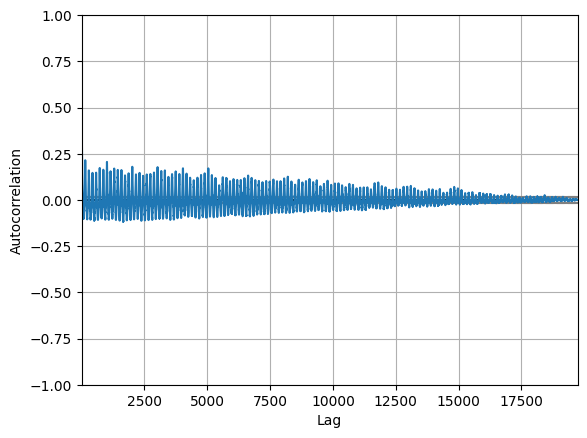

In [59]:
# autocorrelation plot for Appliances to visualize lag significance
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data['Appliances'])
plt.show()

Autocorrelation measures how correlated a value is with its past values.

The plot shows correlations for different lags:

Lag 1 → correlation with the previous reading

Lag 2 → correlation with the value 2 steps ago

… and so on

Helps decide which lag periods are meaningful for creating features.

Example: if autocorrelation is high at lag 3 and 6, then including lag_3 and lag_6 as features makes sense.

Reduces guesswork in selecting lag features.

## **Interaction Features**

In [60]:
# creating interaction features between indoor temperature and humidity
data['in_temp_hum_interaction'] = data['T1'] * data['RH_1']

# creating interaction features between outdoor temperature and humidity
data['out_temp_hum_interaction'] = data['T_out'] * data['RH_out']

# some more interaction features
data['T1_T2_interaction'] = data['T1'] * data['T2']
data['T2_RH_2_interaction'] = data['T2'] * data['RH_2']
data['temp_diff'] = data['T1'] - data['T2']
data['temp_ratio'] = data['T1'] / data['T2']

# Display the interaction features of dataset
print(data[['date','Appliances','in_temp_hum_interaction','out_temp_hum_interaction','T1_T2_interaction','T2_RH_2_interaction','temp_diff','temp_ratio']])

                     date  Appliances  in_temp_hum_interaction  \
0     2016-01-11 17:00:00          60                -2.122636   
1     2016-01-11 17:10:00          60                -1.861640   
2     2016-01-11 17:20:00          50                -1.747997   
3     2016-01-11 17:30:00          50                -1.680581   
4     2016-01-11 17:40:00          60                -1.757628   
...                   ...         ...                      ...   
19730 2016-05-27 17:20:00         100                 3.717356   
19731 2016-05-27 17:30:00          90                 3.682009   
19732 2016-05-27 17:40:00         270                 3.738957   
19733 2016-05-27 17:50:00         420                 3.970678   
19734 2016-05-27 18:00:00         430                 3.740921   

       out_temp_hum_interaction  T1_T2_interaction  T2_RH_2_interaction  \
0                     -0.122493           0.602248            -0.577668   
1                     -0.141106           0.602248       

### Interaction Features in Feature Engineering

Interaction features are new features created by combining two or more existing variables
to capture relationships that may not be obvious when considering individual features alone.
In the context of energy consumption prediction, these features help the model learn
complex dependencies between environmental factors.

Helps:
Captures non-linear relationships
    *Energy consumption often depends on combinations of factors rather than single features.

Provides richer context
    *Interaction features give the model additional informative signals that can improve prediction accuracy.

Enhances model learning
    *Deep learning models, like LSTM, can leverage these features to detect complex patterns in multivariate time-series data.

## **Domain Specific Features**

In [61]:
data['day'] = data['date'].dt.dayofweek # Monday = 0....., Sunday = 6
data['weekday'] = data['date'].dt.dayofweek < 5
data['weekend'] = data['date'].dt.weekday >= 5  # True for Saturday or Sunday; False for weekdays

data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,lag_60,in_temp_hum_interaction,out_temp_hum_interaction,T1_T2_interaction,T2_RH_2_interaction,temp_diff,temp_ratio,day,weekday,weekend
0,2016-01-11 17:00:00,60,0.0,-1.139072,1.863478,-0.528718,1.092582,-1.245155,1.686863,-0.912635,...,NaN,-2.122636,-0.122493,0.602248,-0.577668,-0.610354,2.154405,0,True,False
1,2016-01-11 17:10:00,60,0.0,-1.139072,1.634348,-0.528718,1.075633,-1.245155,1.705307,-0.912635,...,NaN,-1.861640,-0.141106,0.602248,-0.568706,-0.610354,2.154405,0,True,False
2,2016-01-11 17:20:00,50,0.0,-1.139072,1.534580,-0.528718,1.051570,-1.245155,1.749367,-0.948663,...,NaN,-1.747997,-0.159718,0.602248,-0.555984,-0.610354,2.154405,0,True,False
3,2016-01-11 17:30:00,50,0.0,-1.139072,1.475395,-0.528718,1.042363,-1.245155,1.769859,-0.966677,...,NaN,-1.680581,-0.178331,0.602248,-0.551116,-0.610354,2.154405,0,True,False
4,2016-01-11 17:40:00,60,0.0,-1.139072,1.543034,-0.528718,1.027297,-1.245155,1.769859,-0.966677,...,NaN,-1.757628,-0.196944,0.602248,-0.543150,-0.610354,2.154405,0,True,False


### **Encoding Categorical columns**

In [62]:
categorical_columns = data[['day','weekday', 'weekend']]

print(categorical_columns.head())
print(categorical_columns.tail())

   day  weekday  weekend
0    0     True    False
1    0     True    False
2    0     True    False
3    0     True    False
4    0     True    False
       day  weekday  weekend
19730    4     True    False
19731    4     True    False
19732    4     True    False
19733    4     True    False
19734    4     True    False


#### *'day' column is Ordered, label encoding is most suitable Also its better to convert Boolean columns('weekday','weekend') to Integer*

In [63]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
label_encoder = LabelEncoder()
data['day'] = label_encoder.fit_transform(data['day'])

# Converting boolean columns to integer
data['weekday'] = data['weekday'].astype(int)
data['weekend'] = data['weekend'].astype(int)

print(data.head())

                 date  Appliances  lights        T1      RH_1        T2  \
0 2016-01-11 17:00:00          60     0.0 -1.139072  1.863478 -0.528718   
1 2016-01-11 17:10:00          60     0.0 -1.139072  1.634348 -0.528718   
2 2016-01-11 17:20:00          50     0.0 -1.139072  1.534580 -0.528718   
3 2016-01-11 17:30:00          50     0.0 -1.139072  1.475395 -0.528718   
4 2016-01-11 17:40:00          60     0.0 -1.139072  1.543034 -0.528718   

       RH_2        T3      RH_3        T4  ...  lag_60  \
0  1.092582 -1.245155  1.686863 -0.912635  ...     NaN   
1  1.075633 -1.245155  1.705307 -0.912635  ...     NaN   
2  1.051570 -1.245155  1.749367 -0.948663  ...     NaN   
3  1.042363 -1.245155  1.769859 -0.966677  ...     NaN   
4  1.027297 -1.245155  1.769859 -0.966677  ...     NaN   

   in_temp_hum_interaction  out_temp_hum_interaction  T1_T2_interaction  \
0                -2.122636                 -0.122493           0.602248   
1                -1.861640                 -0.1411

In [64]:
data.isna().sum()

date                         0
Appliances                   0
lights                       0
T1                           0
RH_1                         0
T2                           0
RH_2                         0
T3                           0
RH_3                         0
T4                           0
RH_4                         0
T5                           0
RH_5                         0
T6                           0
RH_6                         0
T7                           0
RH_7                         0
T8                           0
RH_8                         0
T9                           0
RH_9                         0
T_out                        0
Press_mm_hg                  0
RH_out                       0
Windspeed                    0
Visibility                   0
Tdewpoint                    0
rv1                          0
rv2                          0
hour                         0
month                        0
year                         0
rolling_

In [65]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


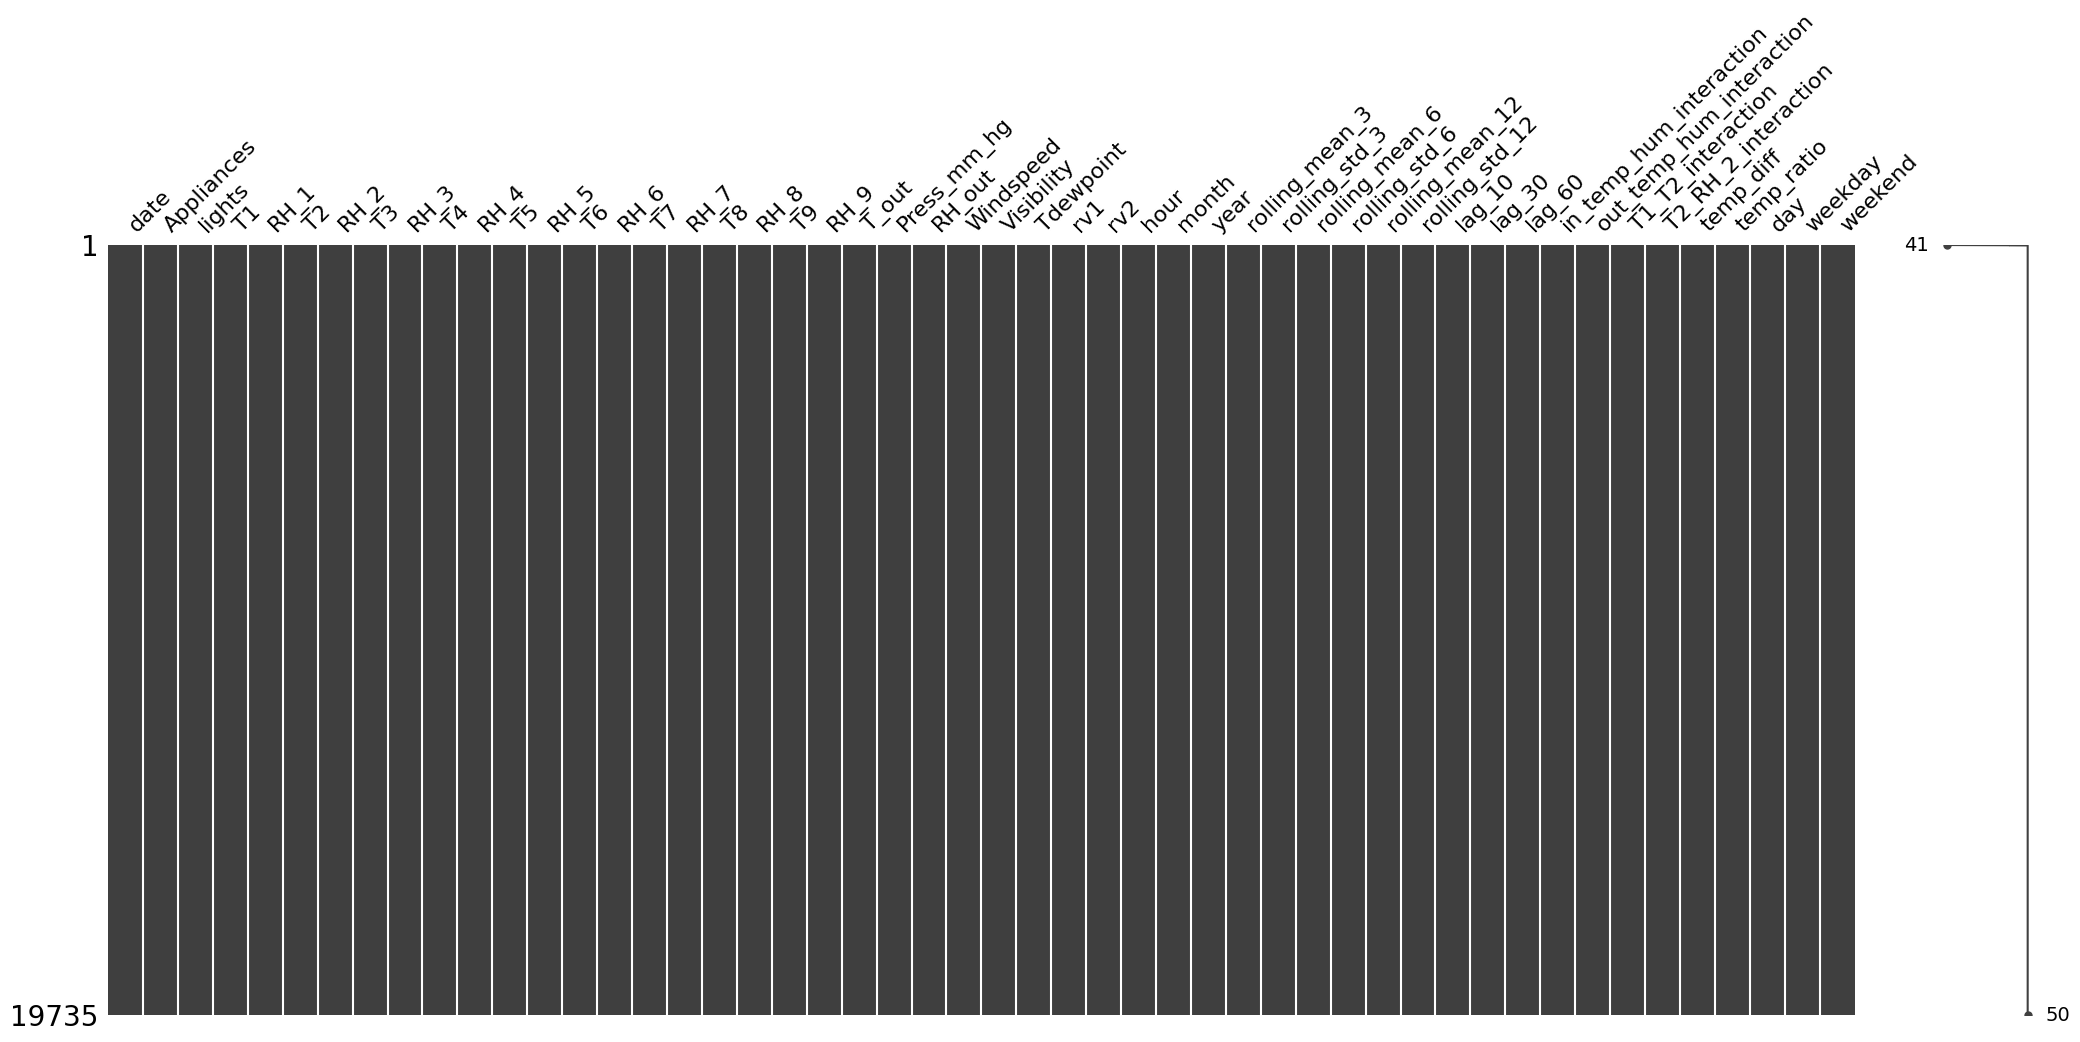

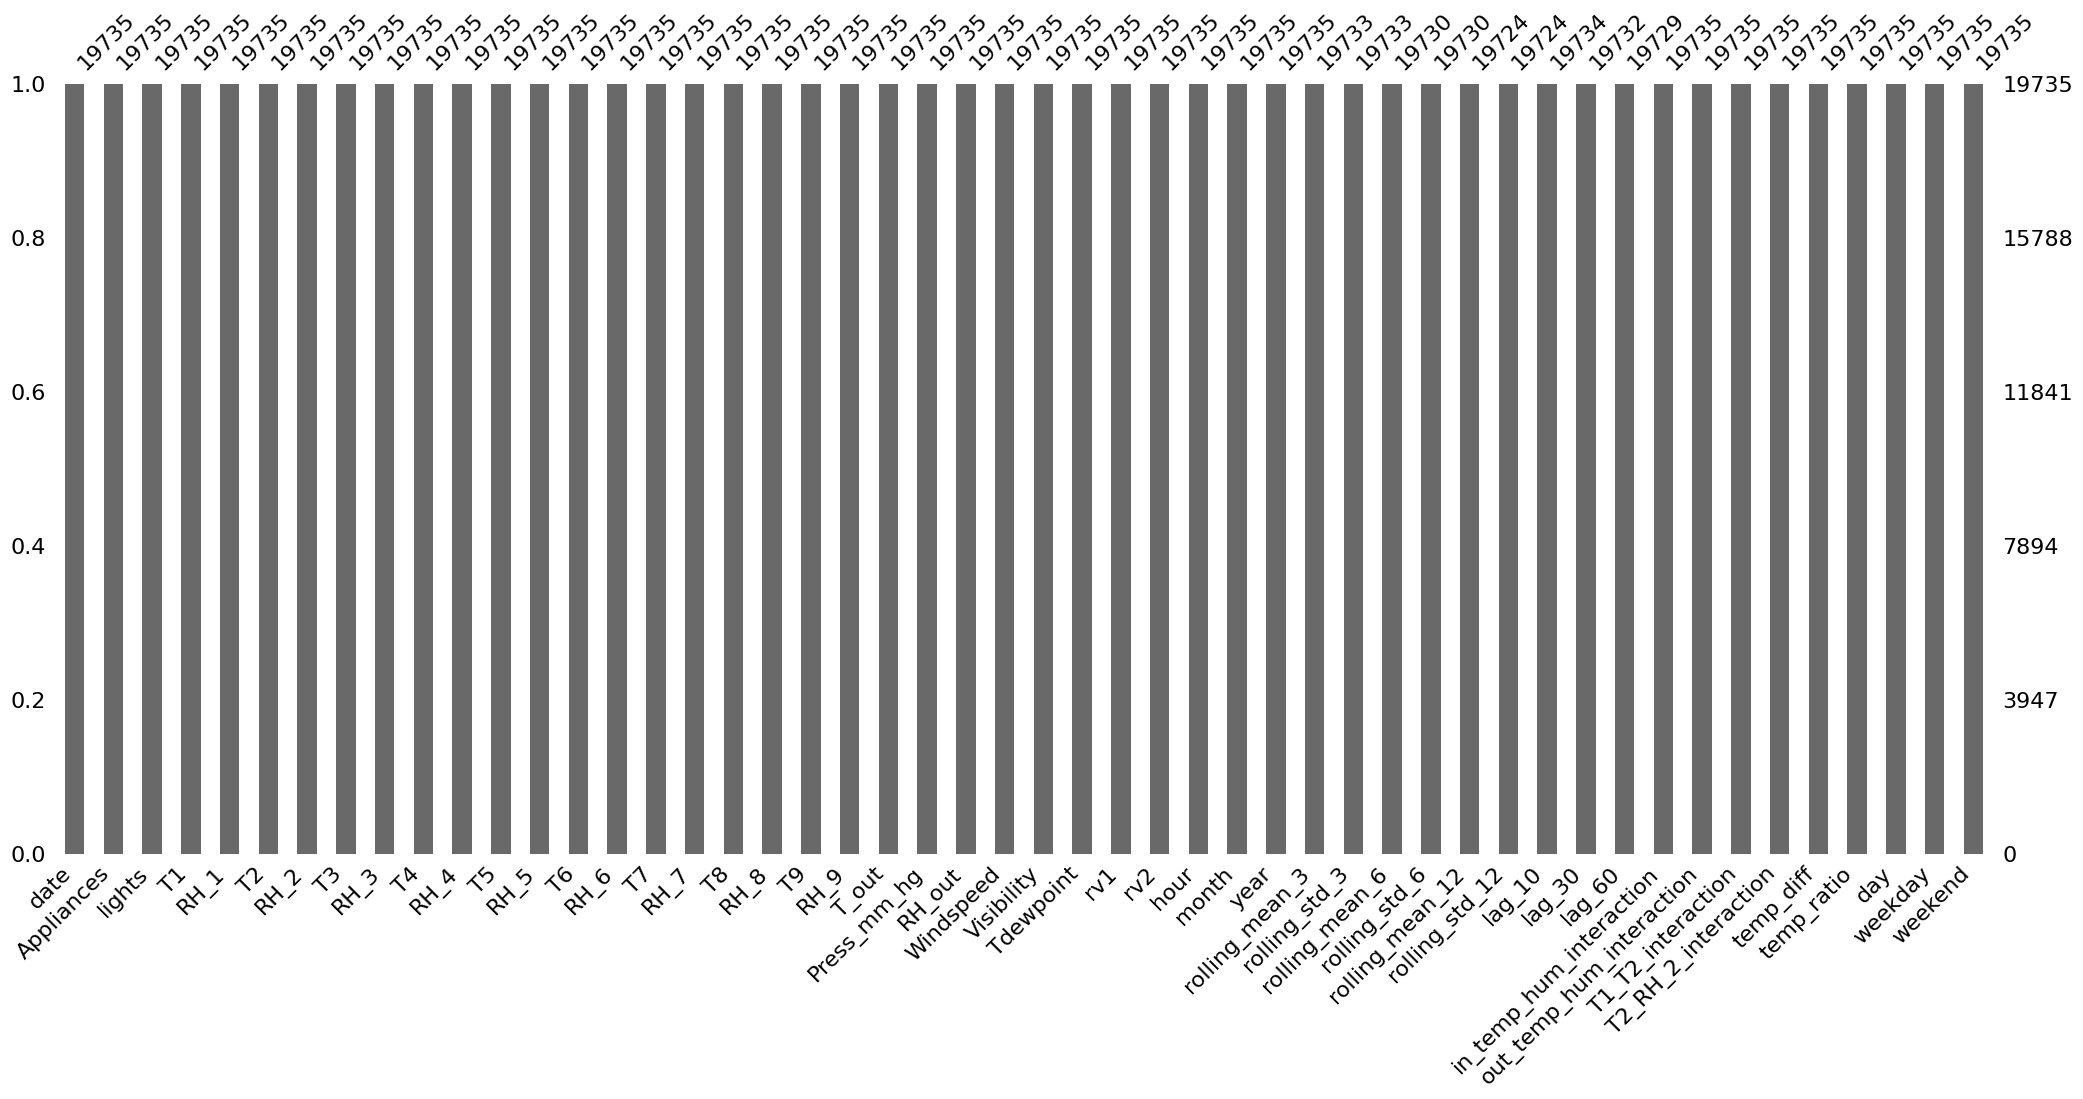

In [66]:
import missingno as msno

msno.matrix(data)
plt.show()

msno.bar(data)
plt.show()

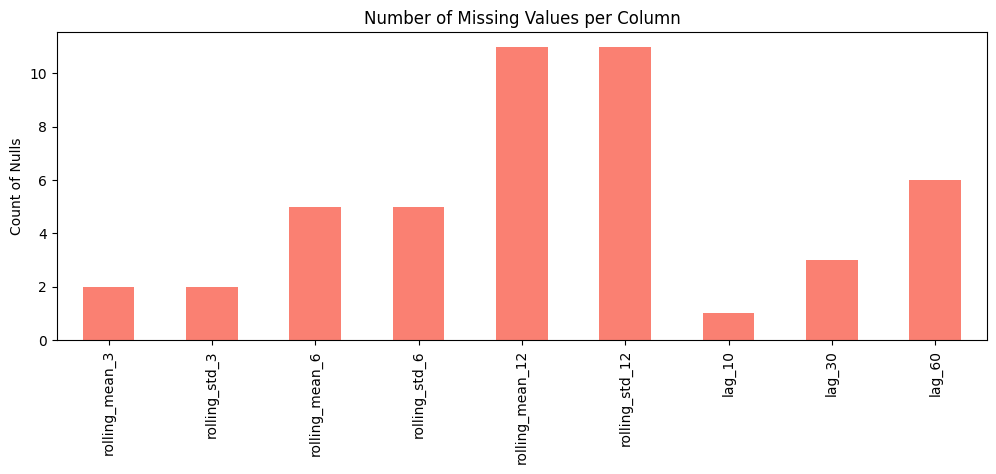

In [67]:
missing_counts = data.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # only columns with missing values

plt.figure(figsize=(12,4))
missing_counts.plot(kind='bar', color='salmon')
plt.title("Number of Missing Values per Column")
plt.ylabel("Count of Nulls")
plt.show()

#### “The missing values in the dataset appear only in rolling and lag features.

#### Rolling features (e.g., rolling_mean_3, rolling_std_6) are computed using a window of previous values, so the first few rows do not have enough previous data to compute the statistics, resulting in NaNs.

#### Lag features (e.g., lag_10, lag_30) shift the column by N steps, so the first N rows are naturally NaN because there is no previous data to fill them.  These missing values are expected in time-series feature engineering.” 

In [68]:
# Step 1: Check which columns have missing values
missing_counts = data.isnull().sum()
print("Missing values before filling:\n", missing_counts[missing_counts > 0])

# Step 2: Fill missing values with the median of each column
data.fillna(data.median(), inplace=True)

# Step 3: Verify that all missing values are filled
missing_counts_after = data.isnull().sum()
print("\nMissing values after filling:\n", missing_counts_after[missing_counts_after > 0])

# Optional: Show first few rows to confirm
print("\nFirst 10 rows after filling missing values:")
print(data.head(10))

Missing values before filling:
 rolling_mean_3      2
rolling_std_3       2
rolling_mean_6      5
rolling_std_6       5
rolling_mean_12    11
rolling_std_12     11
lag_10              1
lag_30              3
lag_60              6
dtype: int64

Missing values after filling:
 Series([], dtype: int64)

First 10 rows after filling missing values:
                 date  Appliances  lights        T1      RH_1        T2  \
0 2016-01-11 17:00:00          60     0.0 -1.139072  1.863478 -0.528718   
1 2016-01-11 17:10:00          60     0.0 -1.139072  1.634348 -0.528718   
2 2016-01-11 17:20:00          50     0.0 -1.139072  1.534580 -0.528718   
3 2016-01-11 17:30:00          50     0.0 -1.139072  1.475395 -0.528718   
4 2016-01-11 17:40:00          60     0.0 -1.139072  1.543034 -0.528718   
5 2016-01-11 17:50:00          50     0.0 -1.139072  1.465249 -0.528718   
6 2016-01-11 18:00:00          60     0.0 -1.139072  1.399300 -0.528718   
7 2016-01-11 18:10:00          60     0.0 -1.160167  1.

In [69]:
import matplotlib.pyplot as plt

# Count missing values per column
missing_counts = data.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # only columns with missing values

if len(missing_counts) > 0:
    plt.figure(figsize=(12,4))
    missing_counts.plot(kind='bar', color='salmon')
    plt.title("Number of Missing Values per Column")
    plt.ylabel("Count of Nulls")
    plt.show()
else:
    print("No missing values in the dataset to plot.")

No missing values in the dataset to plot.


## **Feature Selection**

In [70]:
from sklearn.feature_selection import RFE # Feature selection technique (Recursive Feature Elimination)
from sklearn.ensemble import RandomForestRegressor # Machine learning model (Random Forest)
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets

In [71]:
# Splitting into train and test
X = data.drop(['Appliances', 'date'], axis=1) # Feature set
y = data['Appliances'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [72]:
model = RandomForestRegressor()

#### **Tree-Based Models**

In [73]:
# Train a Random Forest model
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Select top 10 important features (adjust based on your needs)
tree_based_features = feature_importance['Feature'].head(10).tolist()
print("Selected features by Tree-Based Model:\n", tree_based_features)

Selected features by Tree-Based Model:
 ['rolling_mean_3', 'rolling_std_3', 'lag_30', 'lag_10', 'RH_1', 'rolling_std_6', 'rolling_mean_6', 'rolling_std_12', 'rolling_mean_12', 'temp_diff']


#### **Recursive Feature Elimination Method**

In [74]:
# Use RFE to select features
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

print("Selected Features by RFE:\n", selected_features)

Selected Features by RFE:
 Index(['RH_1', 'T8', 'rv2', 'rolling_mean_3', 'rolling_std_3',
       'rolling_mean_6', 'rolling_std_6', 'lag_10', 'lag_30', 'temp_diff'],
      dtype='object')


#### **Correlation with Target**

Correlation of features with target (Appliances):

Appliances                  1.000000
rolling_mean_3              0.859651
lag_10                      0.753168
rolling_std_3               0.746656
rolling_mean_6              0.728938
rolling_std_6               0.714362
rolling_std_12              0.636103
rolling_mean_12             0.634623
lag_30                      0.437802
lag_60                      0.323693
hour                        0.216792
T2                          0.119919
T6                          0.118602
T_out                       0.099854
Windspeed                   0.088185
RH_1                        0.085197
T3                          0.081226
T1                          0.054992
T4                          0.040568
T8                          0.039693
RH_3                        0.036186
in_temp_hum_interaction     0.032103
T7                          0.025798
T5                          0.018618
T1_T2_interaction           0.018522
weekend                 

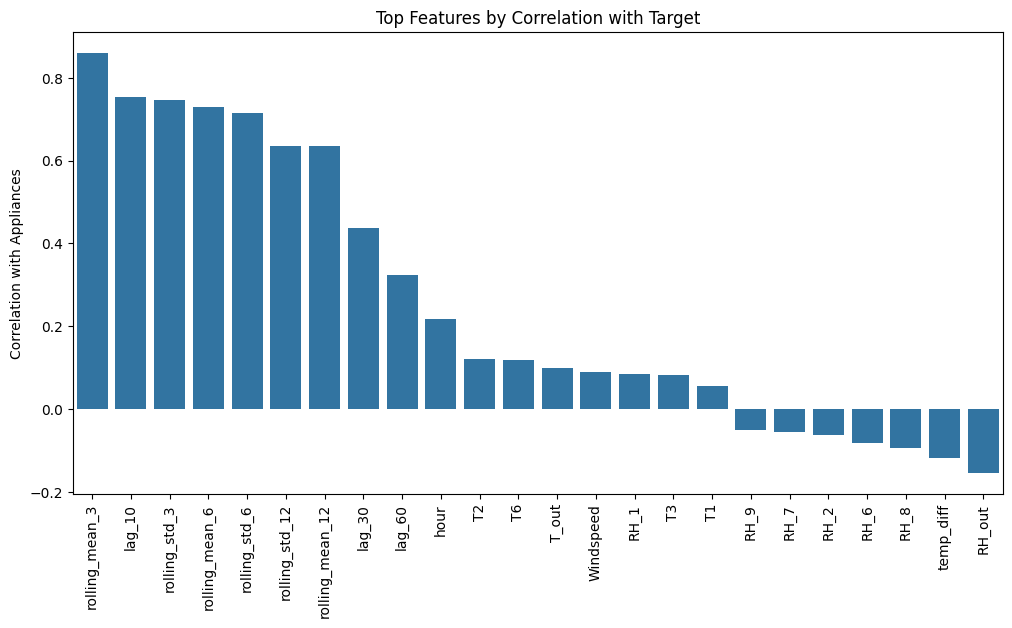

In [75]:
#Compute correlation with target
correlation_with_target = data.corr()['Appliances'].sort_values(ascending=False)

# Print the correlation values
print("Correlation of features with target (Appliances):\n")
print(correlation_with_target)

#Select top correlated features
threshold = 0.05
top_features = correlation_with_target[correlation_with_target.abs() > threshold].index.tolist()

# Remove target itself from the list
top_features = [feat for feat in top_features if feat != 'Appliances']

print("\nSelected Features by Correlation with Target (threshold={}):".format(threshold))
print(top_features)

#Plot correlation
plt.figure(figsize=(12,6))
sns.barplot(x=top_features, y=correlation_with_target[top_features].values)
plt.xticks(rotation=90)
plt.ylabel("Correlation with Appliances")
plt.title("Top Features by Correlation with Target")
plt.show()

#### **Combine selected features from all methods**

In [76]:
# Convert all to sets
set_tree = set(tree_based_features)
set_rfe = set(selected_features)
set_corr = set(top_features)

# Union (any method selected)
combined_features_union = list(set_tree.union(set_rfe).union(set_corr))
print("Combined Features (Union of all methods):")
print(combined_features_union)

# Intersection (all methods agree)-
combined_features_intersection = list(set_tree.intersection(set_rfe).intersection(set_corr))
print("\nCombined Features (Intersection of all methods):")
print(combined_features_intersection)

Combined Features (Union of all methods):
['T6', 'RH_6', 'RH_2', 'lag_60', 'T8', 'Windspeed', 'lag_10', 'T3', 'rolling_mean_12', 'lag_30', 'temp_diff', 'rolling_std_3', 'hour', 'T_out', 'RH_9', 'RH_7', 'T2', 'rv2', 'rolling_std_6', 'rolling_std_12', 'rolling_mean_6', 'RH_8', 'rolling_mean_3', 'RH_1', 'T1', 'RH_out']

Combined Features (Intersection of all methods):
['temp_diff', 'rolling_mean_6', 'rolling_std_3', 'lag_10', 'rolling_mean_3', 'RH_1', 'lag_30', 'rolling_std_6']


In [77]:
import pandas as pd

# Convert all selected features to sets
set_tree = set(tree_based_features)
set_rfe = set(selected_features)
set_corr = set(top_features)

# Combine all features (for comparison purposes)
all_features = list(set_tree.union(set_rfe).union(set_corr))

# Create a DataFrame showing which method selected each feature
comparison_df = pd.DataFrame({
    'Feature': all_features,
    'TreeBased': [1 if f in set_tree else 0 for f in all_features],
    'RFE': [1 if f in set_rfe else 0 for f in all_features],
    'Correlation': [1 if f in set_corr else 0 for f in all_features]
})

# Sort by number of methods that selected each feature (optional)
comparison_df['Selected_by'] = comparison_df[['TreeBased','RFE','Correlation']].sum(axis=1)
comparison_df = comparison_df.sort_values(by='Selected_by', ascending=False)

print(comparison_df)

            Feature  TreeBased  RFE  Correlation  Selected_by
6            lag_10          1    1            1            3
9            lag_30          1    1            1            3
18    rolling_std_6          1    1            1            3
20   rolling_mean_6          1    1            1            3
23             RH_1          1    1            1            3
22   rolling_mean_3          1    1            1            3
11    rolling_std_3          1    1            1            3
10        temp_diff          1    1            1            3
8   rolling_mean_12          1    0            1            2
19   rolling_std_12          1    0            1            2
7                T3          0    0            1            1
3            lag_60          0    0            1            1
4                T8          0    1            0            1
5         Windspeed          0    0            1            1
2              RH_2          0    0            1            1
1       

In [78]:
# Select features chosen by 2 or more methods
final_features = comparison_df[comparison_df['Selected_by'] >= 2]['Feature'].tolist()

# Create dataset with these features + target
combined_data = data[final_features + ['Appliances']]
print("Final selected features:")
print(final_features)
print("\nDataset ready for modeling:")
print(combined_data.head())

Final selected features:
['lag_10', 'lag_30', 'rolling_std_6', 'rolling_mean_6', 'RH_1', 'rolling_mean_3', 'rolling_std_3', 'temp_diff', 'rolling_mean_12', 'rolling_std_12']

Dataset ready for modeling:
   lag_10  lag_30  rolling_std_6  rolling_mean_6      RH_1  rolling_mean_3  \
0    60.0    60.0      11.690452       63.333333  1.863478       60.000000   
1    60.0    60.0      11.690452       63.333333  1.634348       60.000000   
2    60.0    60.0      11.690452       63.333333  1.534580       56.666667   
3    50.0    60.0      11.690452       63.333333  1.475395       53.333333   
4    50.0    60.0      11.690452       63.333333  1.543034       53.333333   

   rolling_std_3  temp_diff  rolling_mean_12  rolling_std_12  Appliances  
0      10.000000  -0.610354        65.833333       14.354811          60  
1      10.000000  -0.610354        65.833333       14.354811          60  
2       5.773503  -0.610354        65.833333       14.354811          50  
3       5.773503  -0.610354 

We selected the final features by comparing three feature selection methods: Random Forest feature importance, RFE, and correlation with the target. Features consistently selected by multiple methods were retained to ensure they are robust and predictive. The final features primarily capture indoor and outdoor environmental conditions, rolling and lagged energy consumption trends, and interaction effects, which are all known to influence appliance energy usage. This selection reduces noise, prevents overfitting, and provides a strong input set for deep learning models.

In [79]:
combined_data.to_csv('../data/processed/combined_data.csv', index=False)